In [126]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('waze_app_dataset.csv')
df.head()

ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  
0              1985.775061             28            19  Android  
1              3160.472914             13            11   iPhone  
2              1610.735904             14             8  Android  
3               587.196542              7             3   iPhone  
4              1219.555924             27            18  Android

In [128]:
df.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

In [129]:
df.dtypes

ID                           int64
label                       object
sessions                     int64
drives                       int64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days                int64
driving_days                 int64
device                      object
dtype: object

### Data Types
#### Numerical Data 
``` ['ID','sessions', 'drives', 'total_sessions', 'n_days_after_onboarding', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives', 'activity_days', 'driving_days']```

#### Categorical Data
``` ['label', 'device']```

In [152]:
numerical_cols = ['ID','sessions', 'drives', 'total_sessions', 'n_days_after_onboarding', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives', 'activity_days', 'driving_days']
categorical_cols = ['label', 'device']

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [131]:
df.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

- Label has 700 missing values
- Remaining data is complete

In [132]:
df.duplicated().sum()

0

- No duplicate rows found

In [133]:
# Numerical data
df.describe()

ID      sessions        drives  total_sessions  \
count  14999.000000  14999.000000  14999.000000    14999.000000   
mean    7499.000000     80.633776     67.281152      189.964447   
std     4329.982679     80.699065     65.913872      136.405128   
min        0.000000      0.000000      0.000000        0.220211   
25%     3749.500000     23.000000     20.000000       90.661156   
50%     7499.000000     56.000000     48.000000      159.568115   
75%    11248.500000    112.000000     93.000000      254.192341   
max    14998.000000    743.000000    596.000000     1216.154633   

       n_days_after_onboarding  total_navigations_fav1  \
count             14999.000000            14999.000000   
mean               1749.837789              121.605974   
std                1008.513876              148.121544   
min                   4.000000                0.000000   
25%                 878.000000                9.000000   
50%                1741.000000               71.000000   
75%                2623.500000              178.000000   
max                3500.000000             1236.000000   

       total_navigations_fav2  driven_km_drives  duration_minutes_drives  \
count            14999.000000      14999.000000             14999.000000   
mean                29.672512       4039.340921              1860.976012   
std                 45.394651       2502.149334              1446.702288   
min                  0.000000         60.441250                18.282082   
25%                  0.000000       2212.600607               835.996260   
50%                  9.000000       3493.858085              1478.249859   
75%                 43.000000       5289.861262              2464.362632   
max                415.000000      21183.401890             15851.727160   

       activity_days  driving_days  
count   14999.000000  14999.000000  
mean       15.537102     12.179879  
std         9.004655      7.824036  
min         0.000000      0.000000  
25%         8.000000      5.000000  
50%        16.000000     12.000000  
75%        23.000000     19.000000  
max        31.000000     30.000000

- For the columns ```'drives', 'total_sessions', 'n_days_after_onboarding', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives'``` a huge gap is seen between the 75th percentile and the max value, which might indicate the possibility of the data having outliers.

In [134]:
# drives
px.box(df, x='drives')

In [135]:
px.histogram(df, x='drives')

<Axes: xlabel='drives', ylabel='Count'>

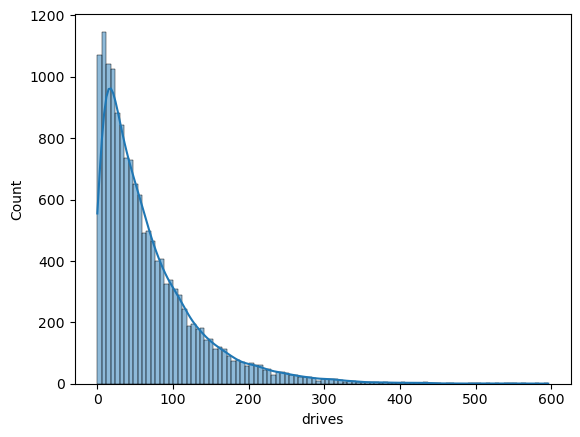

In [136]:
sns.histplot(data=df, x="drives", kde=True)

- The drives column has a large number of outliers and is heavily skewed towards the right, i.e. positively skewed

In [137]:
px.box(df, x='n_days_after_onboarding')

In [138]:
px.histogram(df, x='n_days_after_onboarding')

<Axes: xlabel='n_days_after_onboarding', ylabel='Count'>

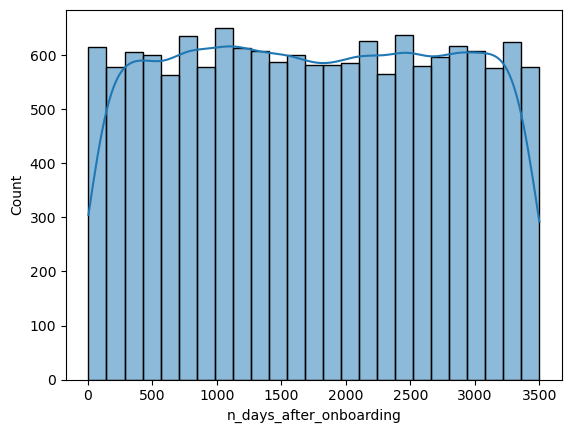

In [139]:
sns.histplot(data=df, x='n_days_after_onboarding',kde=True)

- The column `n_days_after_onboarding` doesn't show any outliers, and also represents a normal distribution.

In [140]:
# total_navigations_fav1

px.box(df, x='total_navigations_fav1')

<Axes: xlabel='total_navigations_fav1', ylabel='Count'>

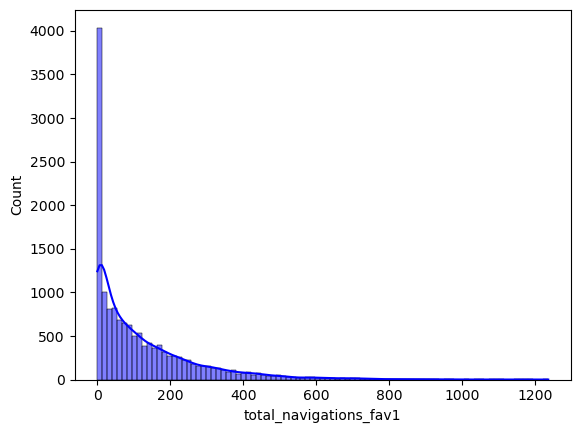

In [141]:
sns.histplot(data=df, x="total_navigations_fav1", kde=True, color="blue")

- The total_navigations_fav1 column has a large number of outliers and is heavily skewed towards the right (positive skewed).

In [142]:
# driven_km_drives 
px.box(df, x='driven_km_drives')

<Axes: xlabel='driven_km_drives', ylabel='Count'>

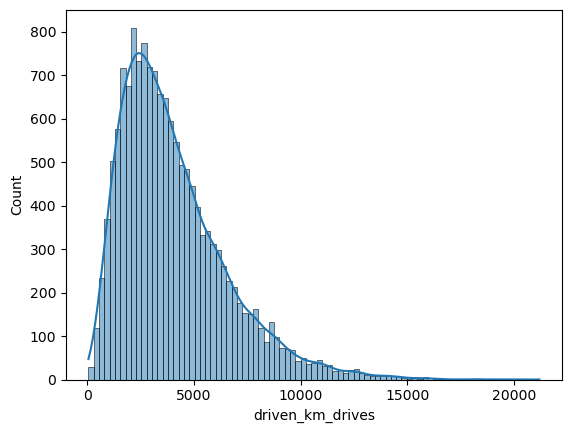

In [143]:
sns.histplot(data=df, x='driven_km_drives', kde=True)

- The `driven_km_drives` also has a huge number of outliers with data heavily skewed towards the right (positive skew)

In [144]:
# duration_minutes_drives
px.box(df, x='duration_minutes_drives')

<Axes: xlabel='duration_minutes_drives', ylabel='Count'>

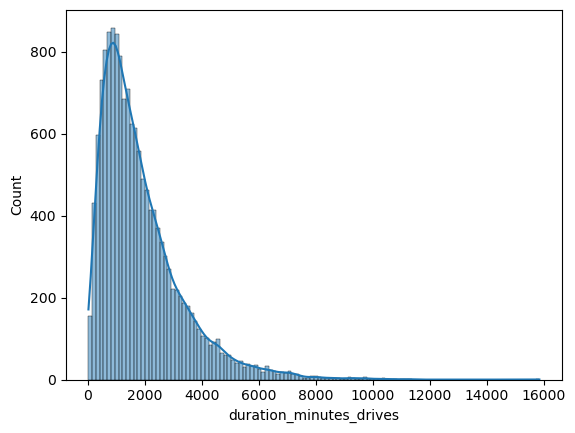

In [145]:
sns.histplot(data=df, x='duration_minutes_drives', kde=True)

- The `duration_minutes_drives` also has a huge number of outliers with data heavily skewed towards the right (positive skew)

### Outlier Removal

Column - `'drives'`

In [150]:
# IQR method for outlier removal
def remove_outliers(df, column):
  upper_limit =  df[column].quantile(0.99)
  lower_limit =  df[column].quantile(0.01)

  new_df = df.copy()

  new_df[column] = np.where(
      (new_df[column] >= upper_limit),
      upper_limit,
      new_df[column]
  )
  new_df[column] = np.where(
      (new_df[column] <= lower_limit),
      lower_limit,
      new_df[column]
  )
  fig1 = px.box(df, x=column, title=f'{column} column before outlier removal')
  fig2 = px.box(new_df, x=column, title=f'{column} column after outlier removal')
  fig1.show()
  fig2.show()

  df[column] = new_df[column]
   

In [147]:
# Outlier removal for `drives` column
remove_outliers(df, 'drives')


Column - `total_navigations_fav1`

In [148]:
# Remove outliers - total_navigations_fav1
remove_outliers(df, 'total_navigations_fav1')


Column - `driven_km_drives`

In [149]:
remove_outliers(df, 'driven_km_drives')

Column - `duration_minutes_drives`

In [151]:
remove_outliers(df, 'duration_minutes_drives')

We used the IQR (Inter Quartile Range) method to detect and reduce outliers by a significant amount. 

In [153]:
print("numerical cols ", numerical_cols)
print("categorical cols ", categorical_cols)

numerical cols  ['ID', 'sessions', 'drives', 'total_sessions', 'n_days_after_onboarding', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives', 'activity_days', 'driving_days']
categorical cols  ['label', 'device']


In [156]:
filtered_cols = ['drives', 'n_days_after_onboarding', 'driven_km_drives', 'duration_minutes_drives', 'activity_days', 'driving_days', 'label', 'device']
df = df[filtered_cols]

In [157]:
df.head()

drives  n_days_after_onboarding  driven_km_drives  duration_minutes_drives  \
0   226.0                     2276       2628.845068              1985.775061   
1   107.0                     1225      12270.449083              3160.472914   
2    95.0                     2651       3059.148818              1610.735904   
3    40.0                       15        913.591123               587.196542   
4    68.0                     1562       3950.202008              1219.555924   

   activity_days  driving_days     label   device  
0             28            19  retained  Android  
1             13            11  retained   iPhone  
2             14             8  retained  Android  
3              7             3  retained   iPhone  
4             27            18  retained  Android

In [158]:
df.isna().sum()

drives                       0
n_days_after_onboarding      0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
label                      700
device                       0
dtype: int64

#### Missing values

In [162]:
df['label'].value_counts()

label
retained    11763
churned      2536
Name: count, dtype: int64

In [163]:
# %age of missing labels
(df['label'].isna().sum() / df['label'].shape[0]) * 100

4.666977798519902

As it is clearly visible that the missing values are less than 5%, so we'll replace them with the mode of the data.

In [168]:
df['label'].fillna(df['label'].mode().values[0], inplace=True)

In [169]:
df.isna().sum()

drives                     0
n_days_after_onboarding    0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
label                      0
device                     0
dtype: int64

In [170]:
df.head()

drives  n_days_after_onboarding  driven_km_drives  duration_minutes_drives  \
0   226.0                     2276       2628.845068              1985.775061   
1   107.0                     1225      12270.449083              3160.472914   
2    95.0                     2651       3059.148818              1610.735904   
3    40.0                       15        913.591123               587.196542   
4    68.0                     1562       3950.202008              1219.555924   

   activity_days  driving_days     label   device  
0             28            19  retained  Android  
1             13            11  retained   iPhone  
2             14             8  retained  Android  
3              7             3  retained   iPhone  
4             27            18  retained  Android

#### Multivariate Analysis 

<Axes: >

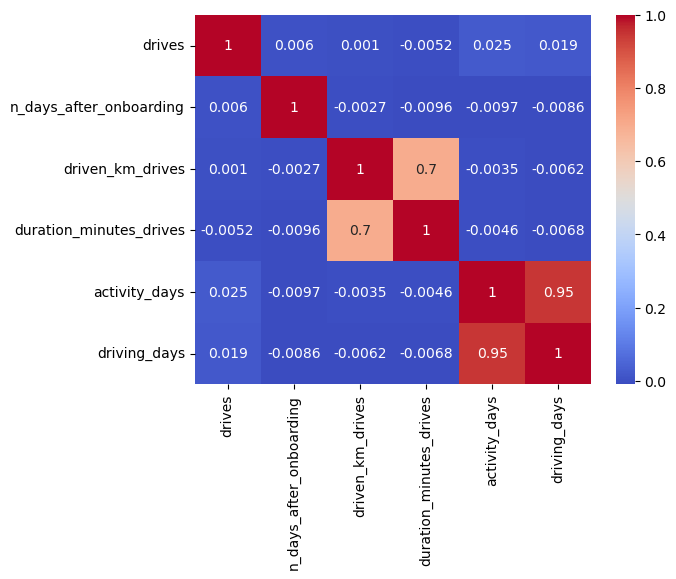

In [179]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")

From the above heatmap we can see the following colums show a high correlation:
- `duration_minutes_drives` and `driven_km_drives` with a correlation of 0.7
- `activity_days` and `driving_days`

In [183]:
df.sample(10)

drives  n_days_after_onboarding  driven_km_drives  \
7567     84.0                     2982       9744.026822   
13220   244.0                     3190       2282.964591   
14273   297.0                      144       4381.298950   
9680     16.0                     3496       2178.375484   
854      95.0                     1208       3341.326409   
4686    178.0                     3435       3094.502700   
13248    66.0                     1316       4184.031584   
6025    180.0                     2409       5398.409170   
7015    222.0                      222       5066.428990   
10639    37.0                      373       2383.143155   

       duration_minutes_drives  activity_days  driving_days     label   device  
7567               3569.971354              2             2  retained   iPhone  
13220              1588.665351             15            11  retained  Android  
14273              1980.974998             25            16  retained   iPhone  
9680                974.167808             30            22  retained  Android  
854                 922.582197              2             0  retained   iPhone  
4686               2145.604205             27            22  retained  Android  
13248              2116.527825             25            24  retained   iPhone  
6025               1178.825652             30            29  retained   iPhone  
7015               1439.862141             18            12  retained  Android  
10639               540.135644             21            12  retained   iPhone

In [237]:
# Avg. churn rate by device type
churned_users_by_device_df = df[df['label'] == 'churned'].groupby('device').count().reset_index()
retained_users_by_device_df = df[df['label'] == 'retained'].groupby('device').count().reset_index()
churned_users_by_device_df

device  drives  n_days_after_onboarding  driven_km_drives  \
0  Android     891                      891               891   
1   iPhone    1645                     1645              1645   

   duration_minutes_drives  activity_days  driving_days  label  
0                      891            891           891    891  
1                     1645           1645          1645   1645

In [238]:
retained_users_by_device_df

device  drives  n_days_after_onboarding  driven_km_drives  \
0  Android    4436                     4436              4436   
1   iPhone    8027                     8027              8027   

   duration_minutes_drives  activity_days  driving_days  label  
0                     4436           4436          4436   4436  
1                     8027           8027          8027   8027

In [215]:
android_churned = df['device'].value_counts().get('Android')
iphone_churned = df['device'].value_counts().get('iPhone')

In [235]:
# Churn rate of Android users
android_churn_rate = (churned_users_by_device_df[churned_users_by_device_df['device'] == 'Android']['label'].values[0] / android_churned) * 100
iphone_churn_rate = (churned_users_by_device_df[churned_users_by_device_df['device'] == 'iPhone']['label'].values[0] / iphone_churned) * 100
print(f"Churn rate of Android users, {android_churn_rate.round(2)}%")
print(f"Churn rate of iPhone users, {iphone_churn_rate.round(2)}%")

Churn rate of Android users, 16.73%
Churn rate of iPhone users, 17.01%


Insights
- 17.01% of the total iPhone users left the app
- 16.73% of the total Android users left the app

In [236]:
px.bar(x='device', y='label', data_frame=churned_users_by_device_df, title='Churned Users by Device Type')

In [247]:
# Avg activity days of retained v/s churned users

df.groupby('label')['activity_days'].mean().round()


label
churned     10.0
retained    17.0
Name: activity_days, dtype: float64

<Axes: title={'center': 'Average Activity Days of Retained v/s Churned Users'}, xlabel='label'>

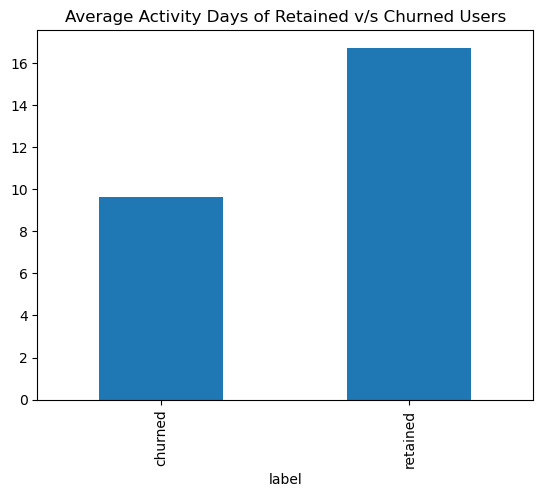

In [248]:
df.groupby('label')['activity_days'].mean().plot(kind='bar', title='Average Activity Days of Retained v/s Churned Users')

Insights
- Avg. activity of churned users on the app is 10 days
- Avg. activity of retained users on the app is 17 days